In [1]:
!pip -q install tensorflow

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

In [10]:
# Загрузка датасетов с удалением ненужных столбцов по дате и времени
base_data = pd.read_csv('/content/drive/MyDrive/EUR_USD.csv', sep=';')

In [11]:
print(base_data.columns)

Index(['Date', 'Price', 'Open', 'Max', 'Min', 'Change'], dtype='object')


In [12]:
# Объединение данных из 2-х файлов
data = base_data.drop(columns=['Date'])

# Сохранение результата в новый CSV файл
data.to_csv('/content/drive/MyDrive/EUR_USD_pre.csv', sep=';', index=False)

In [13]:
# Просмотр размерности новой таблицы
print(data.shape)

(6818, 5)


In [14]:
print(data.columns)

Index(['Price', 'Open', 'Max', 'Min', 'Change'], dtype='object')


In [15]:
# Загрузка данных
data = pd.read_csv('/content/drive/MyDrive/EUR_USD_pre.csv', sep=';')

# Подготовка данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Price'].values.reshape(-1, 1))

prediction_days = 60

x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data) - 30):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x:x+30, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
model_conv_2 = Sequential()
model_conv_2.add(Conv1D(30, 1, input_shape=(x_train.shape[1], 1), activation='linear'))
model_conv_2.add(Flatten())
model_conv_2.add(Dense(10, activation='linear'))
model_conv_2.add(Dense(30, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model_conv_2.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')
model_conv_2.fit(x_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1623
Epoch 2/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0578
Epoch 3/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0209
Epoch 4/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0065
Epoch 5/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031
Epoch 6/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024
Epoch 7/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022
Epoch 8/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 9/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021
Epoch 10/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 11/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 12/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 13/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018
Epoch 14/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017
Epoch 15/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1

In [23]:
# Сохранение модели
model_conv_2.save('/content/drive/MyDrive/EUR_USD.h5')

In [24]:
# Тестирование модели
x_test = []
test_data = scaled_data[len(scaled_data) - prediction_days - 30:]

for x in range(prediction_days, len(test_data)):
    x_test.append(test_data[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


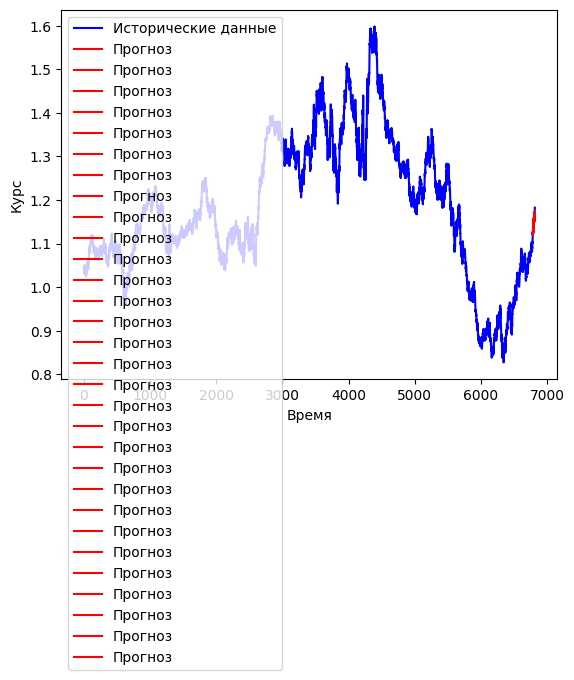

In [26]:
# Отображение результатов
import matplotlib.pyplot as plt

plt.plot(data['Price'], color='blue', label='Исторические данные')
plt.plot(range(len(data) - len(predictions), len(data)), predictions, color='red', label='Прогноз')
plt.xlabel('Время')
plt.ylabel('Курс')
plt.legend()
plt.show()

In [28]:
# Загрузка модели
model = load_model('/content/drive/MyDrive/EUR_USD.h5')